In [2]:
import os
from pydicom import dcmread
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale, rotate, iradon
import cv2
import numpy as np
from tqdm import tqdm
import polars as pl

In [7]:
_pth = os.path.join(os.path.dirname(os.getcwd()), 'dataset', '2')
_files = os.listdir(_pth)

In [8]:
dcm = dcmread(os.path.join(_pth, _files[0]))

In [10]:
g_angle = []
_images = np.zeros((1190, 1190, len(_files)), dtype=np.uint16)
prev = np.zeros((1190, 1190), dtype=np.uint16)
curr = np.zeros((1190, 1190), dtype=np.uint16)
_raw_datas = []
for idx, _fname in enumerate(tqdm(_files)):
    raw = dcmread(os.path.join(_pth, _fname))
    curr = raw.pixel_array
    
    _m = curr - prev
    if np.min(_m) > 10000:
        _images[:, :, idx] = _images[ :, :, idx-1]
        g_angle.append(g_angle[idx-1])
    else:
        _images[:, :, idx] = curr - prev
        prev = curr
        g_angle.append(raw.GantryAngle)

100%|██████████| 398/398 [00:13<00:00, 28.54it/s]


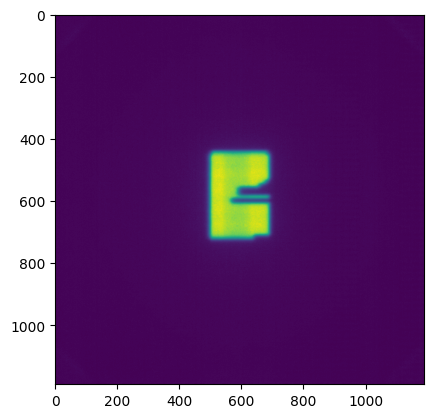

In [11]:
plt.imshow(_images[:, :, 200])

Text(0.5, 0, 'Frames')

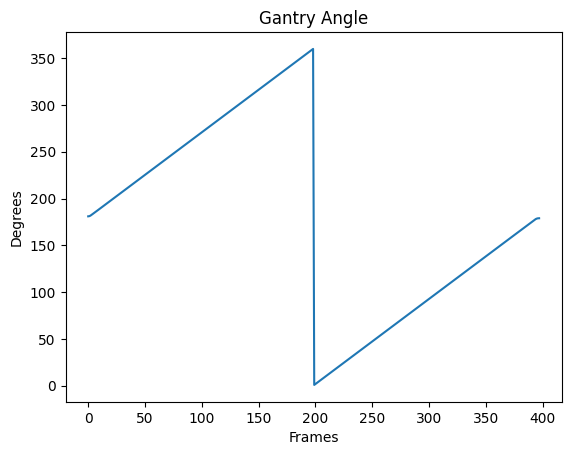

In [24]:
plt.plot(g_angle)
plt.title('Gantry Angle')
plt.ylabel('Degrees')
plt.xlabel('Frames')

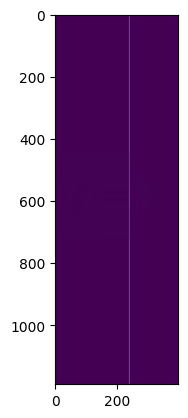

In [13]:
plt.imshow(_images[:, 595, :])

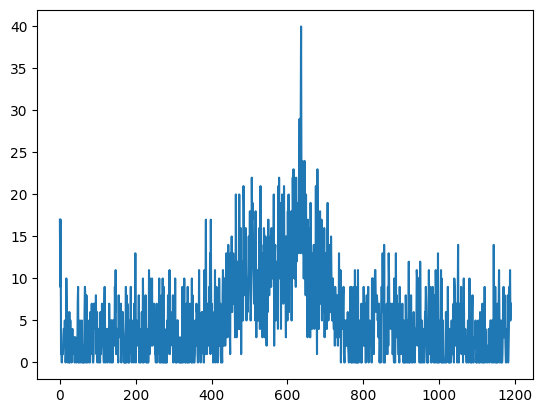

In [15]:
plt.plot(_images[:, 595, 3])

In [16]:
len(_images[0, 0, :])

398

In [17]:
_check = []

for i in range(len(_images[0, 0, :])):
    _check.append(np.mean(_images[:, 595, i]))

In [18]:
_images[:, 595, 157] = _images[:, 595, 156]
_images[:, 595, 355] = _images[:, 595, 354]

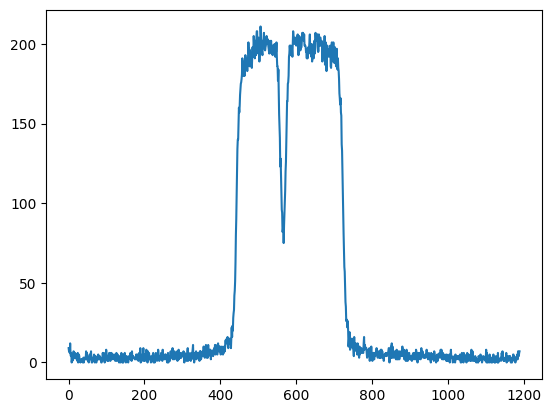

In [19]:
plt.plot(_images[:, 595, 354])

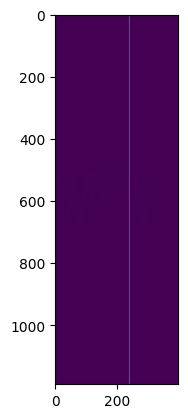

In [20]:
plt.imshow(_images[594, :, :])

In [21]:
_projections = []

_p = radon(_images[:, 595, :], theta=_ang['gantry_angle'], circle=False)
projection = iradon(_p, theta=_ang['gantry_angle'], circle=False)


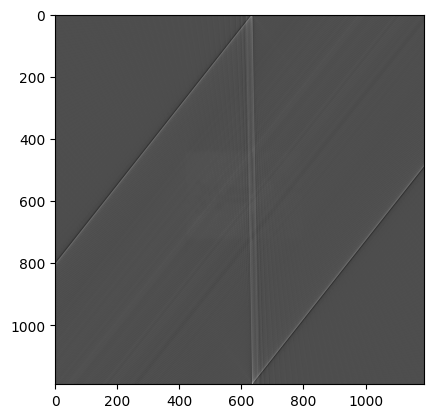

In [22]:
plt.imshow(projection, cmap='gray')